In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('CICIDS2017_dataset.csv')

In [3]:
output = []

for label in data['Label'].unique():
    d = data[data['Label'] == label]
    output.append(d.sample(n=100, replace=True))

In [4]:
output_data = pd.concat([output[0], output[1], output[2], output[3], output[4], output[5], output[6], output[7], output[8], output[9], output[10], output[11], output[12], output[13]] )

In [5]:
pdCat = pd.Categorical(output_data['Label'])
output_data['LabelAsValue'] = pdCat.codes

In [7]:
output_data

,_Source_Port,_Destination_Port,_Protocol,_Flow_Duration,_Total_Fwd_Packets,_Total_Backward_Packets,Total_Length_of_Fwd_Packets,_Total_Length_of_Bwd_Packets,_Fwd_Packet_Length_Max,_Fwd_Packet_Length_Min,...,_Active_Std,_Active_Max,_Active_Min,Idle_Mean,_Idle_Std,_Idle_Max,_Idle_Min,Label,class,LabelAsValue
17685,61510,53,17,48041,1,1,51,101.0,51,51,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
13636,9341,8080,6,1000423,3,3,0,18.0,0,0,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
6138,54244,53,17,189,2,2,82,210.0,41,41,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
7717,58410,53,17,216,2,2,64,196.0,32,32,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
1161,55318,53,17,215,2,2,64,164.0,32,32,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34203,1260,444,6,99651130,15,15,5108,90.0,1460,6,...,0.000000e+00,570315.0,570315.0,98500000.0,0.0,98500000.0,98500000.0,Infiltration,1,9
34202,1260,444,6,66695827,32,34,11898,460.0,1460,0,...,3.625700e+05,730747.0,6123.0,21700000.0,14900000.0,37000000.0,7268675.0,Infiltration,1,9
34218,1260,444,6,48450959,7,8,1959,48.0,963,6,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration,1,9
34214,1260,444,6,117923038,45,40,15754,240.0,1460,6,...,2.987575e+06,5095488.0,870419.0,55700000.0,52500000.0,92800000.0,18600000.0,Infiltration,1,9


In [8]:
output_data.to_csv('CICIDS_reduced.csv')

In [12]:
data = pd.read_csv('CICIDS_reduced.csv')

import numpy as np
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from sklearn import preprocessing

ddd = data.values[:,:-3]

print (ddd)

ddd = np.nan_to_num(ddd)

print(ddd)

ddd = ddd / np.max(ddd)

print(ddd)

print (np.max(ddd))

[[17685 61510 53 ... 0.0 0.0 0.0]
 [13636 9341 8080 ... 0.0 0.0 0.0]
 [6138 54244 53 ... 0.0 0.0 0.0]
 ...
 [34218 1260 444 ... 0.0 0.0 0.0]
 [34214 1260 444 ... 52500000.0 92800000.0 18600000.0]
 [34189 54131 444 ... 0.0 9785751.0 9785751.0]]
[[17685 61510 53 ... 0.0 0.0 0.0]
 [13636 9341 8080 ... 0.0 0.0 0.0]
 [6138 54244 53 ... 0.0 0.0 0.0]
 ...
 [34218 1260 444 ... 0.0 0.0 0.0]
 [34214 1260 444 ... 52500000.0 92800000.0 18600000.0]
 [34189 54131 444 ... 0.0 9785751.0 9785751.0]]
[[0.000147375 0.0005125833333333333 4.416666666666667e-07 ... 0.0 0.0 0.0]
 [0.00011363333333333334 7.784166666666667e-05 6.733333333333333e-05 ...
  0.0 0.0 0.0]
 [5.115e-05 0.00045203333333333333 4.416666666666667e-07 ... 0.0 0.0 0.0]
 ...
 [0.00028515 1.05e-05 3.7e-06 ... 0.0 0.0 0.0]
 [0.00028511666666666667 1.05e-05 3.7e-06 ... 0.4375 0.7733333333333333
  0.155]
 [0.0002849083333333333 0.0004510916666666667 3.7e-06 ... 0.0 0.081547925
  0.081547925]]
1.0


In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
ddd2 = min_max_scaler.fit_transform(ddd)

print (ddd2)
pca = PCA(n_components=2)

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(ddd2)
ddd = X_embedded
#ddd = pca.fit_transform(ddd)

[[2.78785418e-04 4.24166182e-01]
 [6.03590928e-03 4.23371369e-01]
 [1.67058271e-04 4.24156089e-01]
 ...
 [2.17666849e-01 4.29255043e-01]
 [8.30046215e-01 5.20503755e-01]
 [5.55963910e-01 6.24036647e-02]]


C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


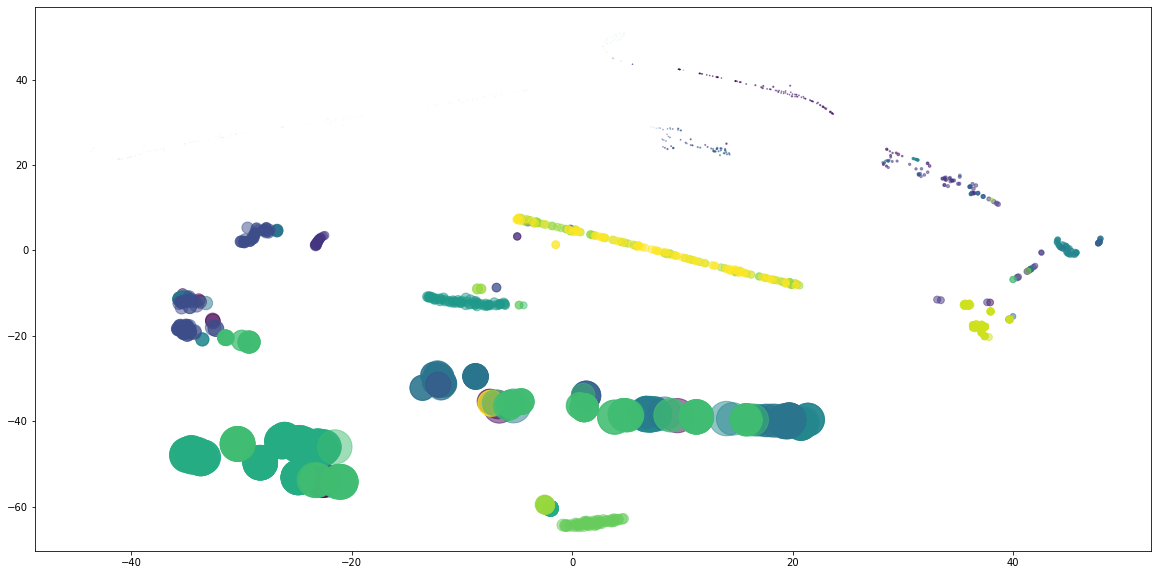

In [21]:
import numpy as np
import matplotlib.pyplot as plt

colour_set = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#444444', '#999999', '#AAAAAA']

N = 50
x = ddd[:,0]
y = ddd[:,1]
colors = data['LabelAsValue']
area = data['_Flow_Duration'] / 100000

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

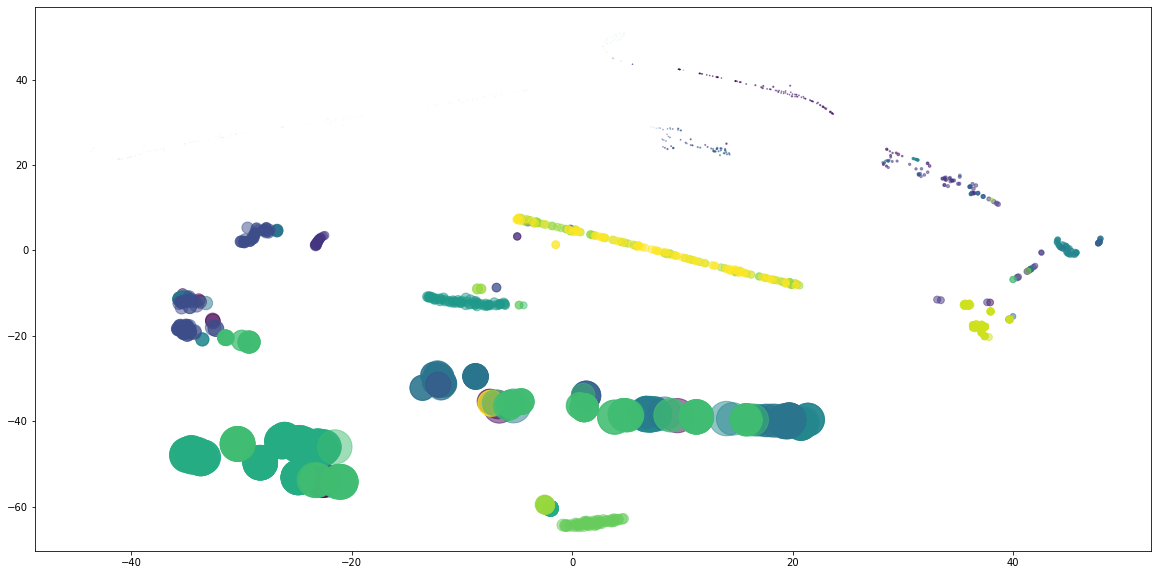

In [22]:
import numpy as np
import matplotlib.pyplot as plt

colour_set = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#444444', '#999999', '#AAAAAA']

N = 50
x = ddd[:,0]
y = ddd[:,1]
colors = data['LabelAsValue']
area = data['_Flow_Duration'] / 100000

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()